# Comprehensive Analysis of Netflix Content

## Objective: 
*To perform a comprehensive analysis of the    Netflix content dataset to gain insights into content types, distribution, trends, geographical distribution, release patterns, and popular directors and actors, providing recommendations for content strategy*

## Importing Needed Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Data

In [26]:
df = pd.read_csv('netflix1.csv')

In [27]:
df.shape

(8790, 10)

In [28]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [29]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,2018-07-06,2016,TV-Y7,1 Season,Kids' TV


## Exploring Data

show the first 5 rows and last 5 rows

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


there are not null values and the data is completed

In [31]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

ther is no nan values

In [32]:
df.duplicated().sum()

0

there is no duplicate values in data

## Cleaning the Data

In [33]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [34]:
df.rename(columns={'date_added':'Date','listed_in':'Category'},inplace=True)

the date is object datatype will convert to date and time

In [35]:
df.head()

,show_id,type,title,director,country,Date,release_year,rating,duration,Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [36]:
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   Date          8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   Category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [38]:
df.describe()

,Date,release_year
count,8790,8790.000000
mean,2019-04-06 20:59:37.883959040,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-01-11 00:00:00,2013.000000
50%,2019-05-12 00:00:00,2017.000000
75%,2020-07-10 00:00:00,2019.000000
max,2021-12-08 00:00:00,2021.000000
std,NaN,8.825466


## Analysis Visualization

The Movie Type

In [39]:
showtype = df['type'].value_counts().reset_index()
showtype

,type,count
0,Movie,6126
1,TV Show,2664


from column type show we have from movie 6126 and tvshow 2664

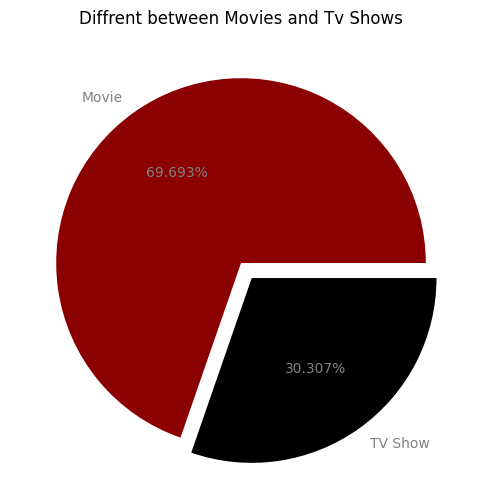

In [40]:
plt.figure(figsize=(20,6))
plt.pie(showtype['count'],labels=['Movie','TV Show'],autopct='%1.3f%%',explode=[0,0.1],colors=['darkred', 'black'],textprops={'color':'grey'})
plt.title('Diffrent between Movies and Tv Shows')
plt.show()

*The analysis shows that movies constitute about 69% of the total content on Netflix, while TV shows make up approximately 31%. This indicates a heavier emphasis on movie content.*

Diffrent between Movies and Tv show

In [41]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'country', 'Date',
       'release_year', 'rating', 'duration', 'Category'],
      dtype='object')

The Director

In [42]:
# the differnce between director is given or not
directors = df['director'].value_counts()
directors.head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

In [43]:
given_directors = directors.sum()-directors.iloc[0]
print( 'Given Directors :', given_directors)

Given Directors : 6202


In [44]:
import plotly.graph_objects as go
plt.figure(figsize=(10,6))
# Assuming you have values for directors[0] and given_directors

fig = go.Figure(data=[go.Pie(labels=['Given Directors', 'Not Given Directors'], 
                             values=[directors[0], given_directors],
                             title='Given Directors Vs Not Given Directors',
                             marker=dict(colors=['black', 'darkred']))])

fig.show()


C:\Users\khaja\AppData\Local\Temp\ipykernel_14868\3971491947.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Figure size 1000x600 with 0 Axes>

*Director information is provided for only 29% of the content, while it is missing for 70%. This indicates a potential area for improving metadata completeness.*

the number of movie or dirctor doing

In [45]:
directors = df.groupby(['director','type'])['director'].value_counts().reset_index().head(10)
directors


,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


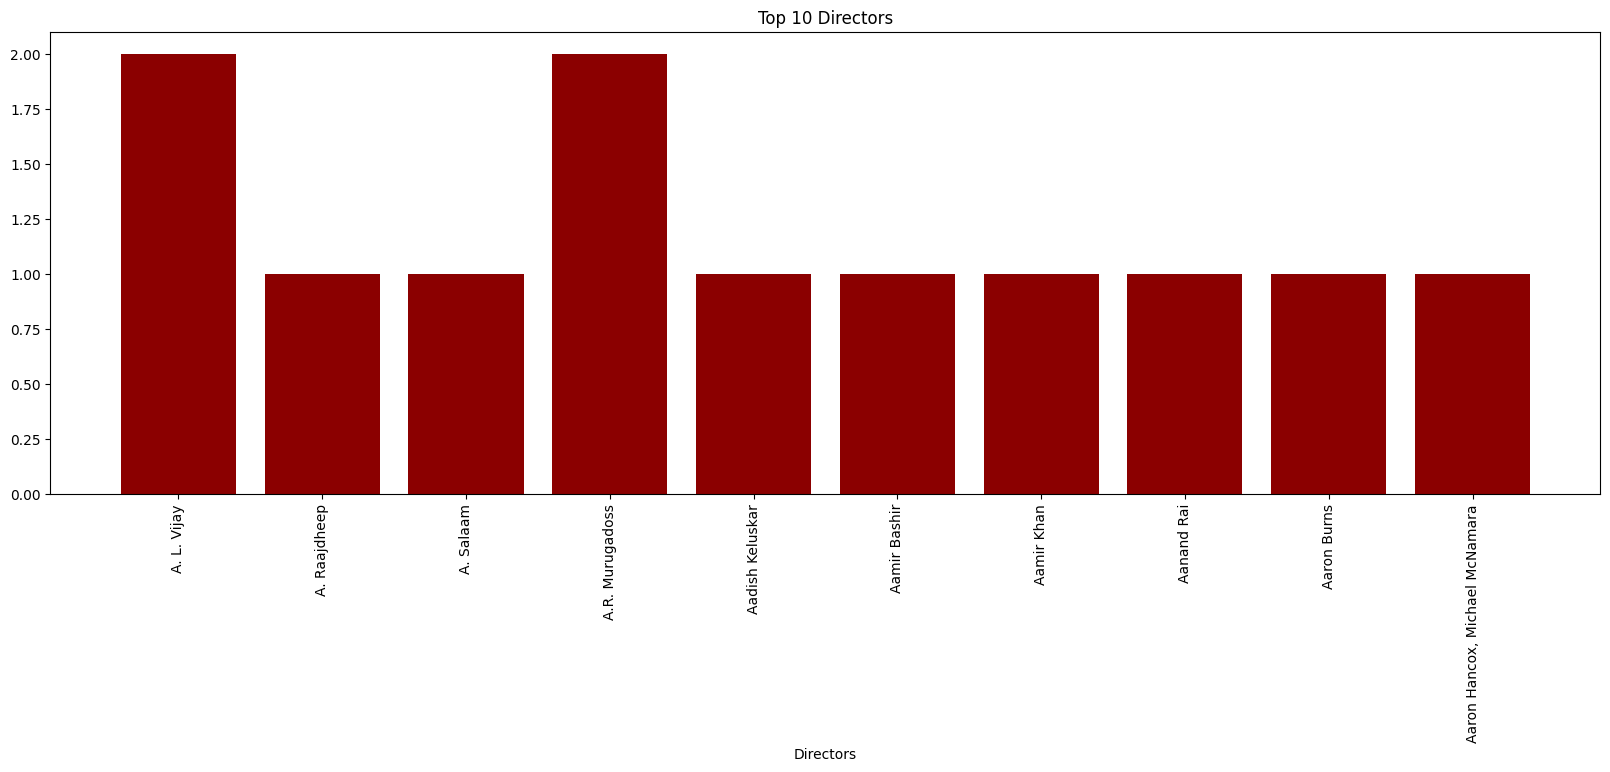

In [46]:
plt.figure(figsize=(20,6))
plt.bar(directors['director'],directors['count'],color='darkred')
plt.title('Top 10 Directors')
plt.xlabel("Directors")
plt.xticks(rotation=90)
plt.show()

*The chart highlights the most frequent directors on Netflix, with directors like A.L. Vijay, A.R. Murugadoss, and Aaron Sorkin having the highest counts of directed content.*


number of movie or TVshow top 10 dirctor

### Country Column

In [47]:
country = df['country'].value_counts().reset_index().sort_values(by='count',ascending=False).head(60)
country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


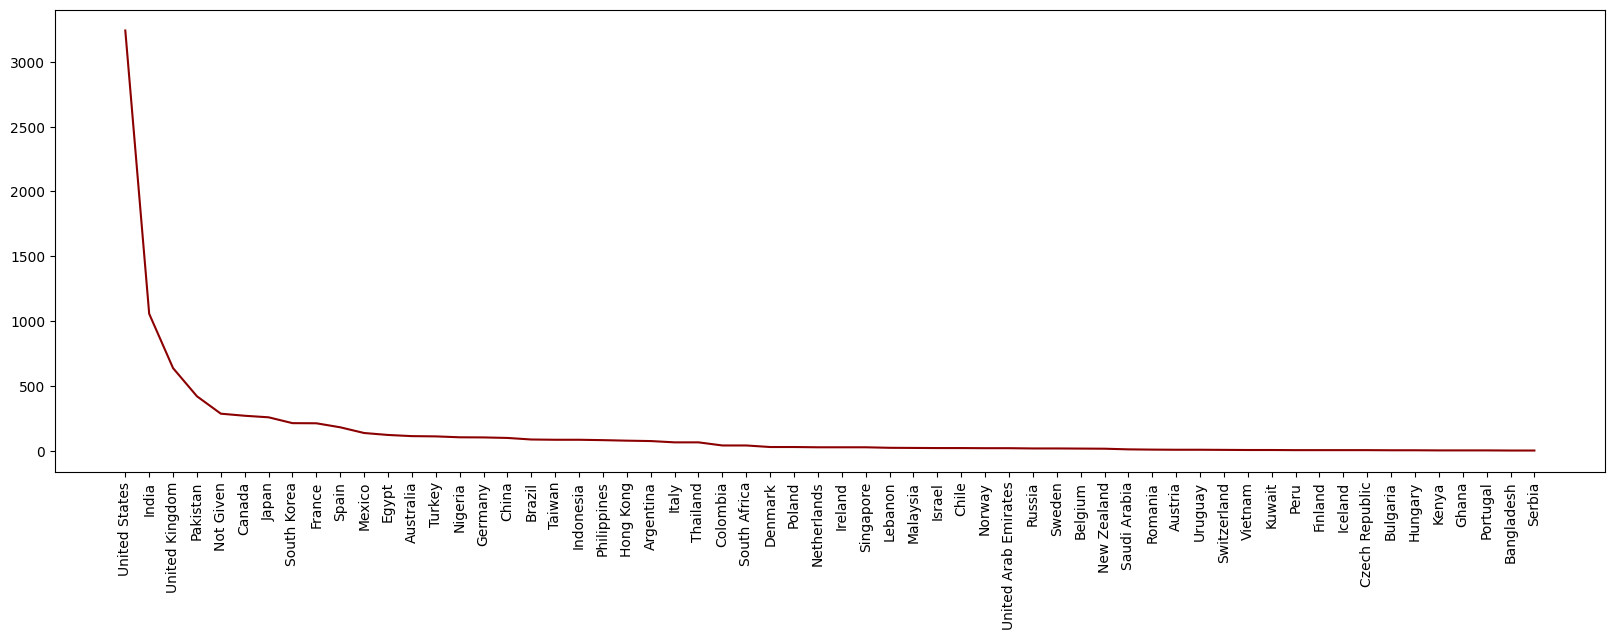

In [48]:
plt.figure(figsize=(20,6))
plt.plot(country['country'],country['count'],color='darkred')
plt.xticks(rotation=90)
plt.show()

This graphs shows more shows is in US

now determine the TVshow and movie in the every countery



### Top 10 Counrty

In [49]:
country = df['country'].value_counts().reset_index().sort_values(by='count',ascending=False).head(10)
country


,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


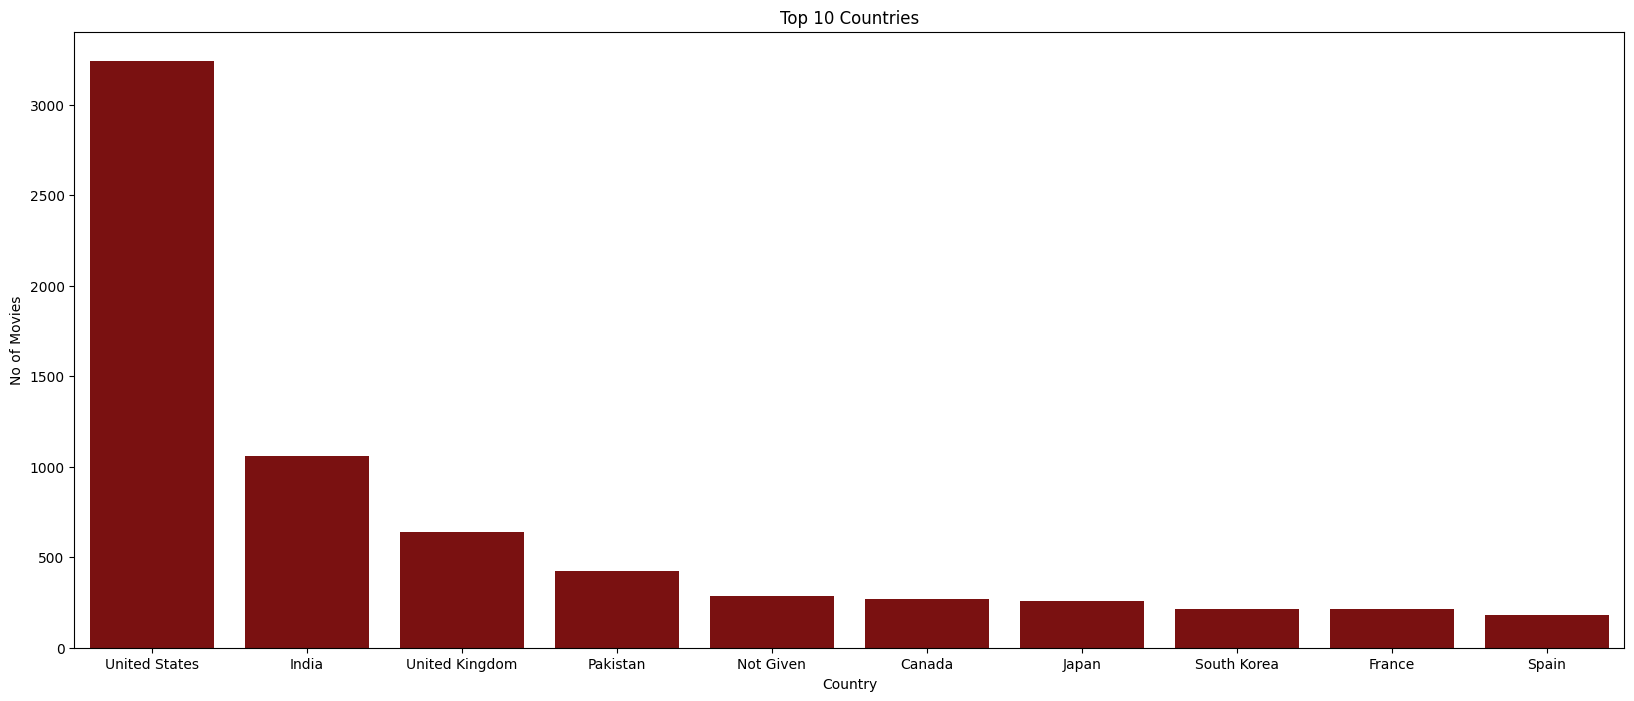

In [50]:
plt.figure(figsize=(20,8))
plt.title("Top 10 Countries")
sns.barplot(x='country',y='count',data=country,color='darkred')
plt.xlabel('Country')
plt.ylabel("No of Movies")
plt.show()

US have the greatest number of movie between top 10 Country

In [51]:
top_10_country = country.sort_values(by='count',ascending=False) .head(10)
top_10_country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


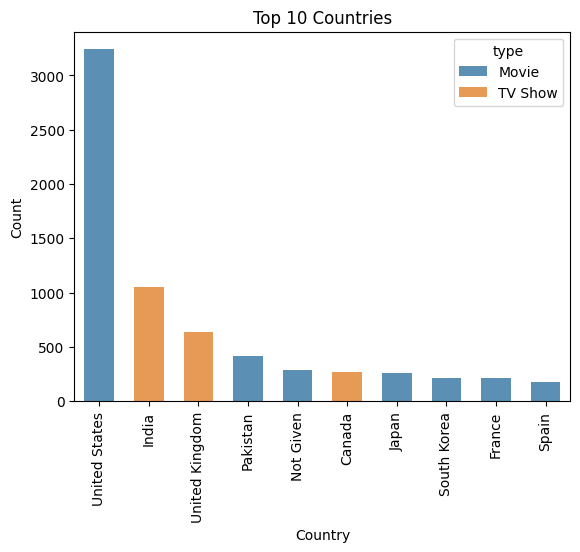

In [52]:

sns.barplot(data=top_10_country,x='country',y='count',hue=df['type'],alpha= 0.8,width=0.6)
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

*The top contributing country to Netflix content is the United States, followed by India and the United Kingdom. The United States has a significantly higher number of movies compared to TV shows, whereas India has a balanced contribution of movies and TV shows.*

### Release Year

In [53]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'Date',
       'release_year', 'rating', 'duration', 'Category'],
      dtype='object')

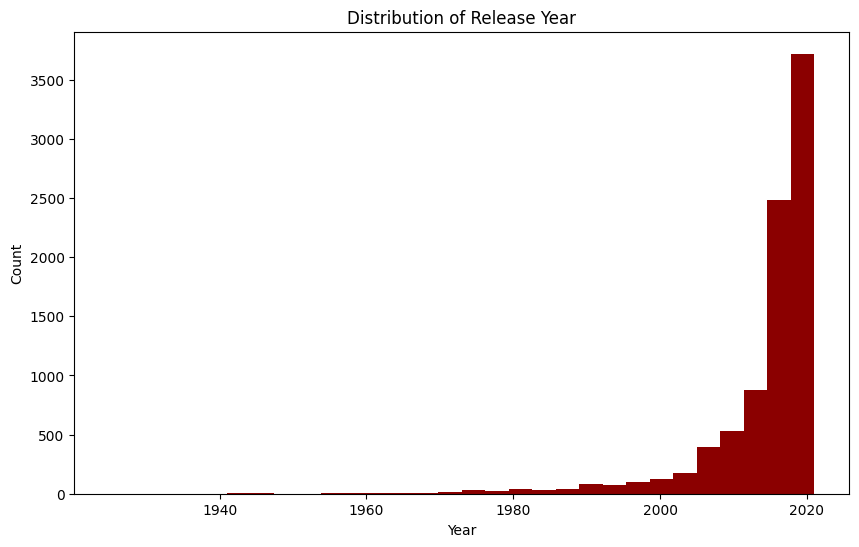

In [54]:
plt.figure(figsize=(10,6))
df['release_year'].plot(kind='hist',bins=30,color='darkred')
plt.title("Distribution of Release Year")
plt.xlabel("Year")
plt.ylabel('Count')
plt.show()

*There has been a significant increase in content additions since 2015, peaking around 2018, indicating an aggressive content expansion strategy. The distribution of release years shows that a vast majority of the content was released after 2000, with a sharp increase post-2010.*

### Rating

In [55]:
ratings = df.groupby(['rating','type'])['type'].value_counts().reset_index()
ratings

,rating,type,count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


In [56]:
top_10_movie_ratings = ratings[ratings['type']=='Movie'].sort_values(by='count',ascending=False).iloc[0:10]
top_10_movie_ratings

,rating,type,count
12,TV-MA,Movie,2062
8,TV-14,Movie,1427
6,R,Movie,797
14,TV-PG,Movie,540
5,PG-13,Movie,490
4,PG,Movie,287
18,TV-Y7,Movie,139
16,TV-Y,Movie,131
10,TV-G,Movie,126
2,NR,Movie,75


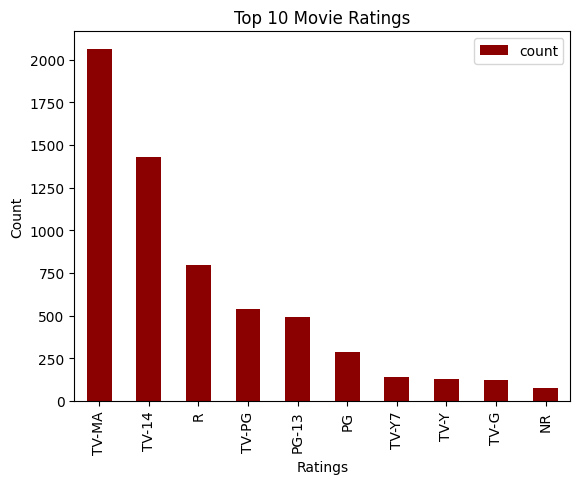

In [57]:

top_10_movie_ratings.plot(kind='bar',x='rating',y='count',color='darkred')
plt.title('Top 10 Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel("Count")
plt.show()

*The majority of the content is rated TV-MA, TV-14, and TV-PG, indicating a focus on mature audiences as well as family-friendly content*

In [58]:
top_10_tvshows_ratings = ratings[ratings['type']== 'TV Show'].sort_values(by='count',ascending=False).iloc[0:10]
top_10_tvshows_ratings

,rating,type,count
13,TV-MA,TV Show,1143
9,TV-14,TV Show,730
15,TV-PG,TV Show,321
19,TV-Y7,TV Show,194
17,TV-Y,TV Show,175
11,TV-G,TV Show,94
3,NR,TV Show,4
7,R,TV Show,2
21,TV-Y7-FV,TV Show,1


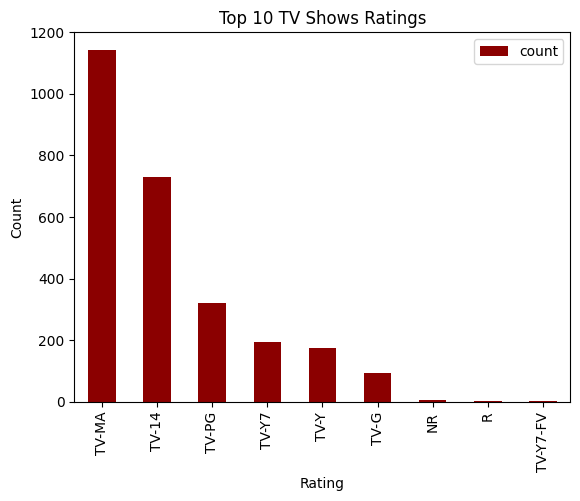

In [59]:
top_10_tvshows_ratings.plot(kind='bar',x='rating',y='count',color='darkred')
plt.title('Top 10 TV Shows Ratings')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

*The majority of the content is rated TV-MA, TV-14, and TV-PG, indicating a focus on mature audiences as well as family-friendly content*

### Duration

In [60]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'Date',
       'release_year', 'rating', 'duration', 'Category'],
      dtype='object')

In [61]:
duration = df.groupby(['duration','type'])['duration'].value_counts().reset_index()
duration

,duration,type,count
0,1 Season,TV Show,1791
1,10 Seasons,TV Show,6
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


In [62]:
top_10_movie_duration = duration[duration['type'] == 'Movie'].sort_values(by='count',ascending=False).iloc[0:10]
top_10_movie_duration

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
215,95 min,Movie,137
216,96 min,Movie,130
212,92 min,Movie,129
5,102 min,Movie,122
218,98 min,Movie,120


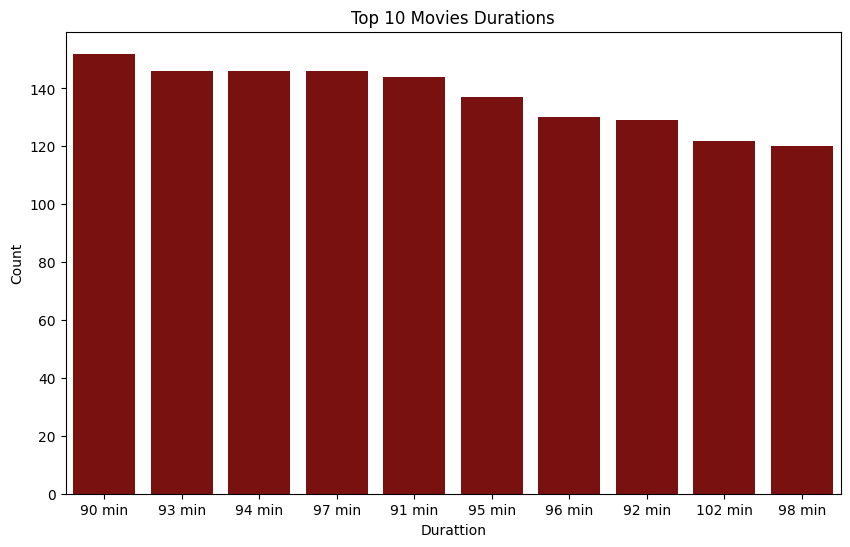

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x='duration',y='count',data=top_10_movie_duration,color='darkred')
plt.title("Top 10 Movies Durations")
plt.xlabel("Durattion")
plt.ylabel("Count")
plt.show()

*Movies have a wide range of durations, while TV shows have more consistent episode lengths, catering to different viewer preferences.*

In [64]:
top_10_tvshows_duration = duration[duration['type'] == 'TV Show'].sort_values(by='count',ascending=False).reset_index().iloc[0:10]
top_10_tvshows_duration

,index,duration,type,count
0,0,1 Season,TV Show,1791
1,110,2 Seasons,TV Show,421
2,138,3 Seasons,TV Show,198
3,151,4 Seasons,TV Show,94
4,162,5 Seasons,TV Show,64
5,174,6 Seasons,TV Show,33
6,185,7 Seasons,TV Show,23
7,196,8 Seasons,TV Show,17
8,208,9 Seasons,TV Show,9
9,1,10 Seasons,TV Show,6


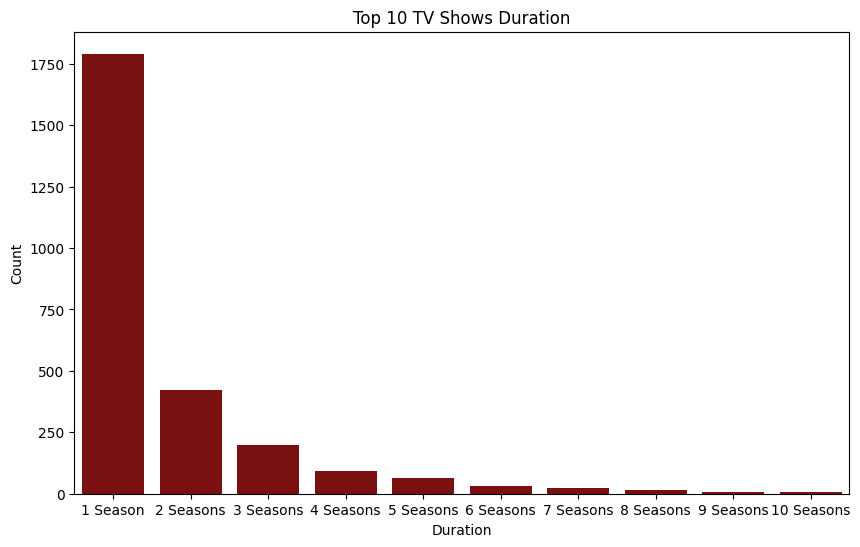

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x='duration',y='count',data=top_10_tvshows_duration,color='darkred')
plt.title("Top 10 TV Shows Duration")
plt.xlabel('Duration')
plt.ylabel("Count")
plt.show()

*Movies have a wide range of durations, while TV shows have more consistent episode lengths, catering to different viewer preferences.*

*Movies have a wide range of durations, while TV shows have more consistent episode lengths, catering to different viewer preferences.*

### Category

In [66]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'Date',
       'release_year', 'rating', 'duration', 'Category'],
      dtype='object')

In [67]:
category = df.groupby(['Category','type'])['Category'].value_counts().reset_index()
category

,Category,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [68]:
Top_10_movies_category = category[category['type'] == 'Movie'].sort_values(by='count',ascending=False).iloc[0:10]
Top_10_movies_category

,Category,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180
216,"Comedies, International Movies",Movie,176


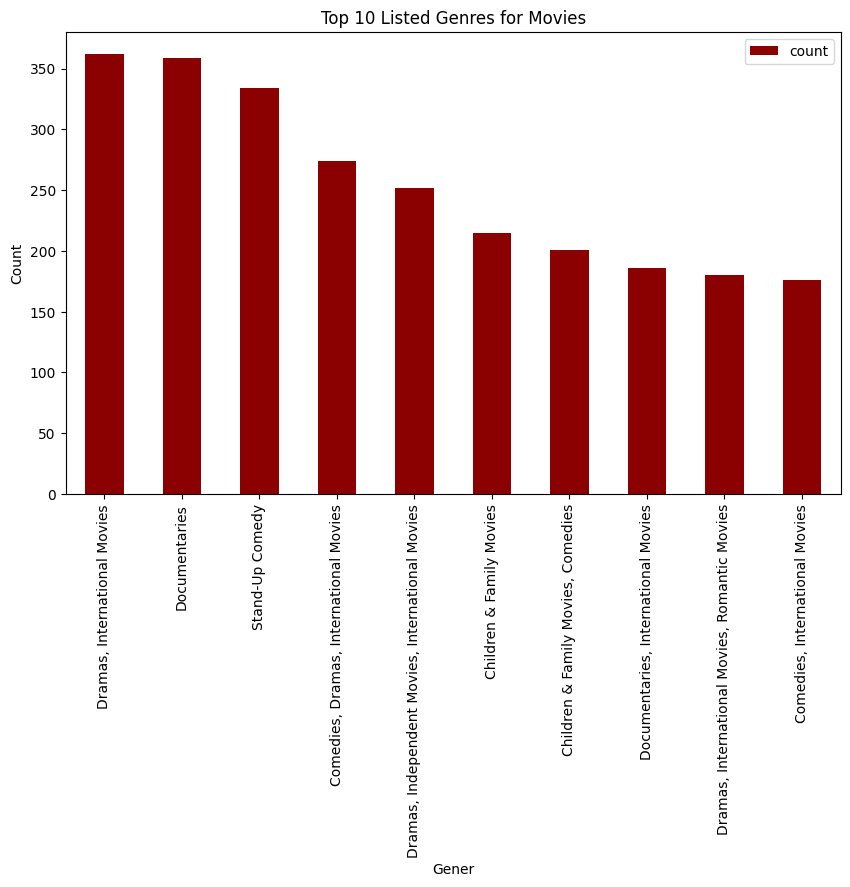

In [69]:

Top_10_movies_category.plot(kind='bar',x='Category',y='count',color='darkred',figsize=(10,6))
plt.title("Top 10 Listed Genres for Movies")
plt.xlabel('Gener')
plt.ylabel('Count')
plt.show()


*The most popular genres are Drama, Comedy, and Documentary, suggesting a strong viewer preference for these types of content*

In [70]:
top_10_listed_in_tv_shows = category[category['type'] == "TV Show"].sort_values(by='count',ascending=False).iloc[0:10]
top_10_listed_in_tv_shows

,Category,type,count
421,Kids' TV,TV Show,219
411,"International TV Shows, TV Dramas",TV Show,121
243,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110
432,"Kids' TV, TV Comedies",TV Show,97
445,Reality TV,TV Show,95
392,"International TV Shows, Romantic TV Shows, TV ...",TV Show,94
393,"International TV Shows, Romantic TV Shows, TV ...",TV Show,90
80,"Anime Series, International TV Shows",TV Show,87
290,Docuseries,TV Show,84
486,TV Comedies,TV Show,68


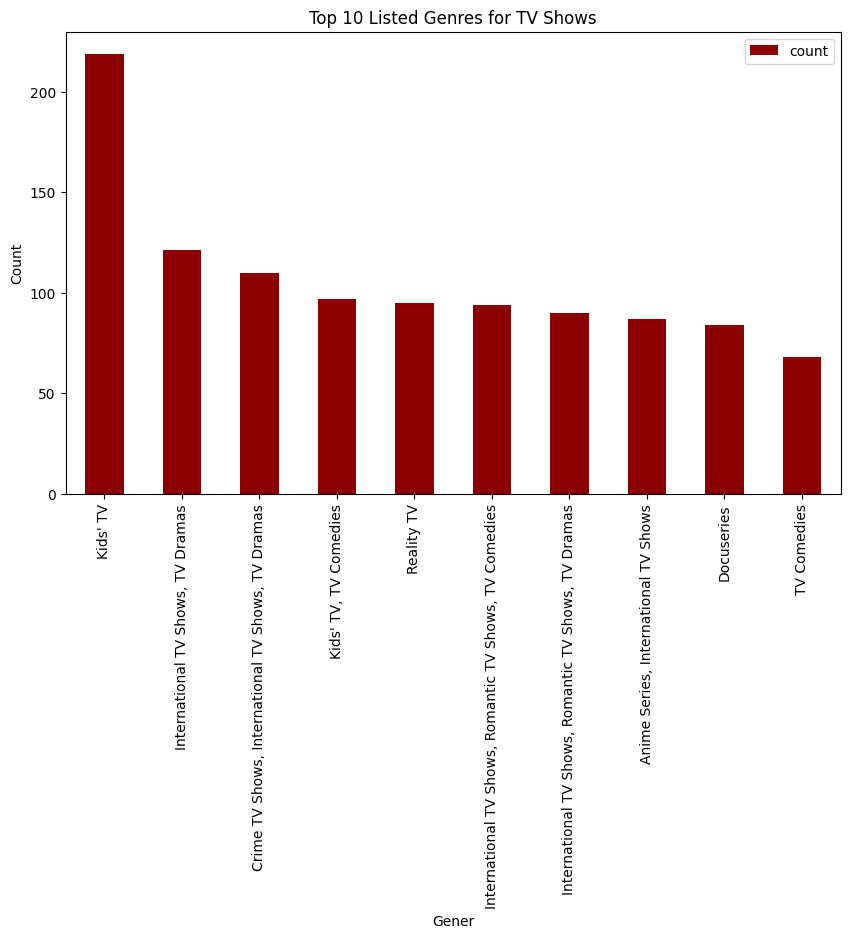

In [71]:
top_10_listed_in_tv_shows.plot(kind='bar',figsize=(10,6),x='Category',y='count',color='darkred')
plt.title("Top 10 Listed Genres for TV Shows")
plt.xlabel("Gener")
plt.ylabel('Count')
plt.show()

*The most popular genres are Kids Tv, Comedy, and Crime Tv Shows, suggesting a strong viewer preference for these types of content.*

## Implications

*The higher proportion of movies suggests that Netflix is focusing more on providing a broad range of single-session viewing experiences. This can attract viewers who prefer watching a complete story in one sitting.*

*The popularity of Drama, Comedy, and Documentary genres suggests that Netflix should continue to invest heavily in these genres to maintain and grow its subscriber base.*

*The consistent length of TV show episodes and the broad range of movie durations highlight the importance of offering varied content to cater to different viewer time commitments.*

*The lack of director information for a significant portion of content suggests that enhancing metadata could improve user experience and content discoverability.*